In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [3]:
# Load dataset
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Describe dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
#mean calculation of Math score
mean = df['math score'].mean()
mean

66.089

In [7]:
#median calculation of reading score
median = df['reading score'].median()
median

70.0

In [8]:
#standard deviation calculation of Writing score
std = df['writing score'].std()
std

15.195657010869642

In [9]:
#skew value of math score
skw = df['math score'].skew()
skw

-0.27893514909431694

In [10]:
#kurtosis value of reading score
krt = df['reading score'].kurtosis()
krt

-0.0682654585647704

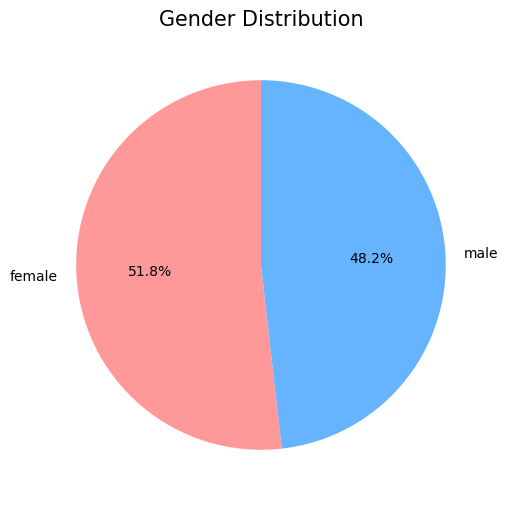

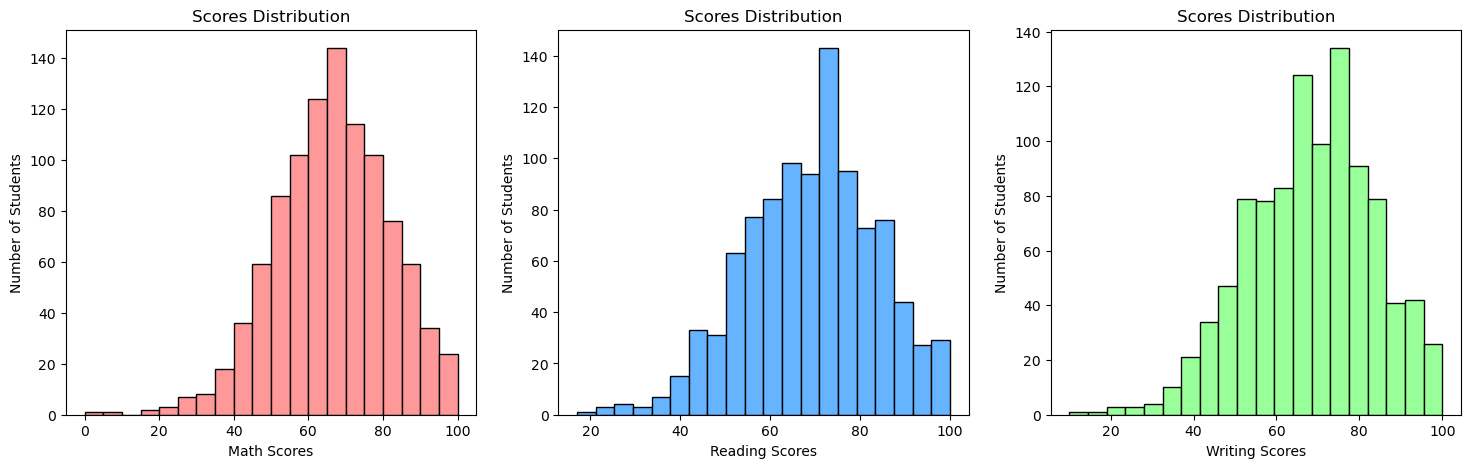

In [11]:
# Pie chart for gender distribution
def plot_pie_hist(df):
    """
    Plots gender distribution pie chart and histograms for math, reading, and writing scores.
    
    """
    # Pie chart for gender distribution
    plt.figure(figsize=(8, 6))
    plt.pie(df['gender'].value_counts(), labels=df['gender'].unique(), startangle=90, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
    plt.title('Gender Distribution', fontsize=15)
    plt.show()

    # Histograms for scores
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    scores = ['math score', 'reading score', 'writing score']
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    titles = ['Math Scores', 'Reading Scores', 'Writing Scores']
    for i in range(3):
        axes[i].hist(df[scores[i]], bins=20, color=colors[i], edgecolor='black')
        axes[i].set_title('Scores Distribution')
        axes[i].set_xlabel(titles[i])
        axes[i].set_ylabel('Number of Students')
    plt.show()
    
plot_pie_hist(df)


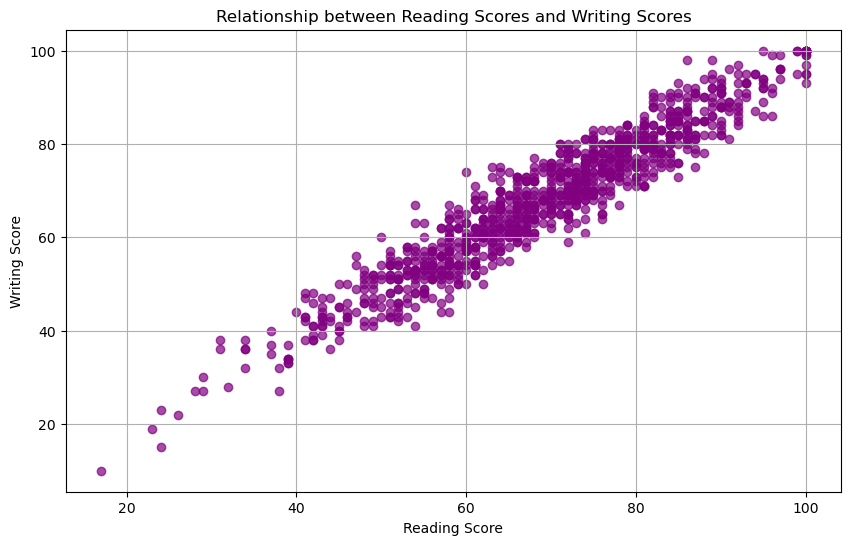

In [12]:
def plot_scatter(df):
    """
    Plots a scatter plot of reading scores vs. writing scores.
    
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['reading score'], df['writing score'], color='purple', alpha=0.7)
    plt.title('Relationship between Reading Scores and Writing Scores')
    plt.xlabel('Reading Score')
    plt.ylabel('Writing Score')
    plt.grid(True)
    plt.show()
    
plot_scatter(df)

C:\Users\manob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\manob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\manob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\manob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

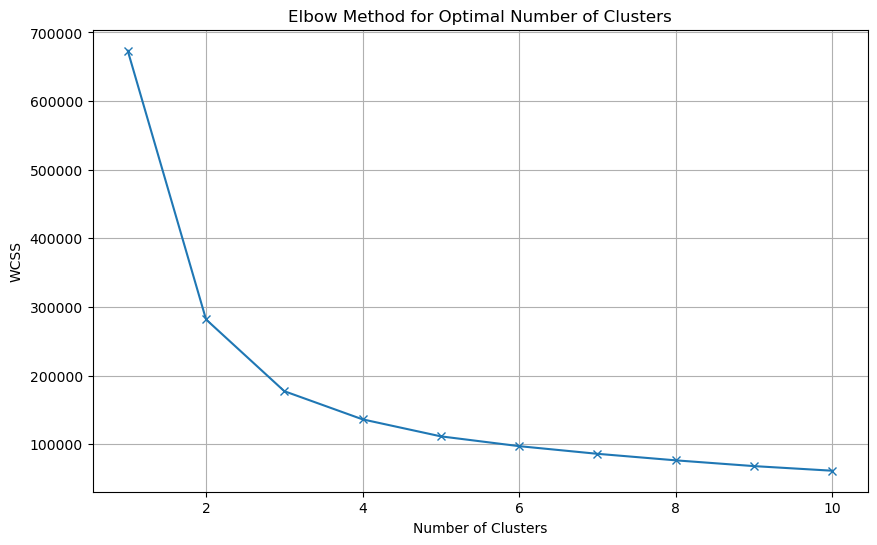

In [13]:
# Prepare data for clustering
clustering_data = df[['math score', 'reading score', 'writing score']]

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss,marker='x')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


C:\Users\manob\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


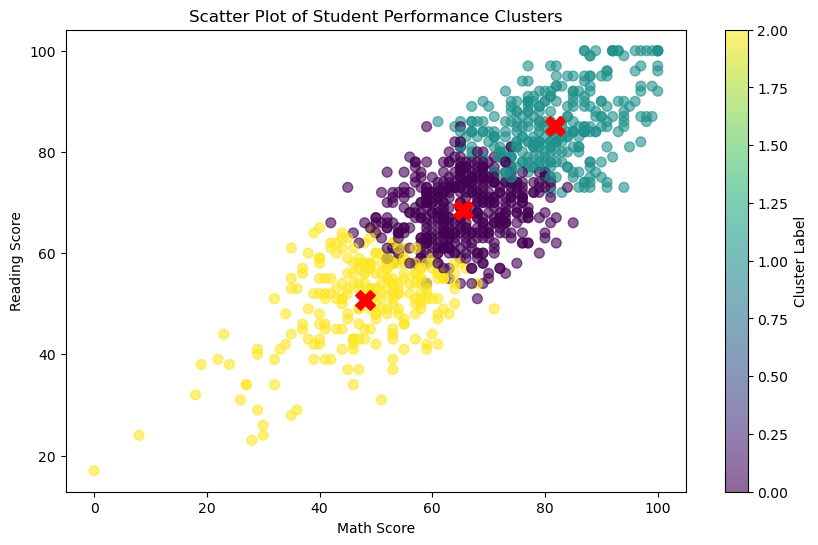

In [14]:
# Applying k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(clustering_data)

# 2D scatter plot for clusters
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(clustering_data['math score'], clustering_data['reading score'], c=cluster_labels, cmap='viridis', marker='o', alpha=0.6, s=50)

# Highlight cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker='X')

# Adding labels and title
ax.set_title('Scatter Plot of Student Performance Clusters')
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')
plt.show()

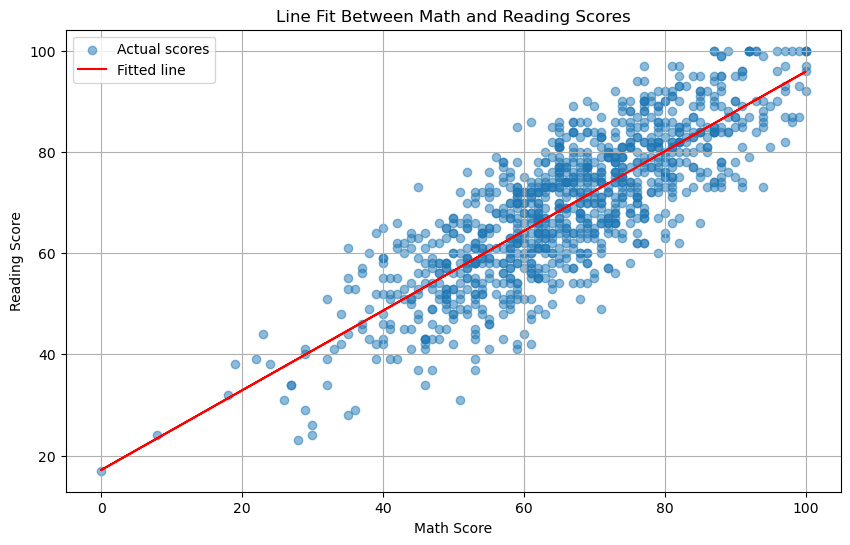

In [15]:
# Preparing data for linear regression
X = df['math score'].values.reshape(-1, 1) 
y = df['reading score'].values.reshape(-1, 1)

# Creating and fitting the linear model
model = LinearRegression()
model.fit(X, y)

# Predicting the reading scores using the fitted model
y_pred = model.predict(X)

# Plotting the line fit
plt.figure(figsize=(10, 6))
plt.scatter(df['math score'], df['reading score'], alpha=0.5, label='Actual scores')
plt.plot(df['math score'], y_pred, color='red', label='Fitted line')
plt.title('Line Fit Between Math and Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.grid(True)
plt.show()


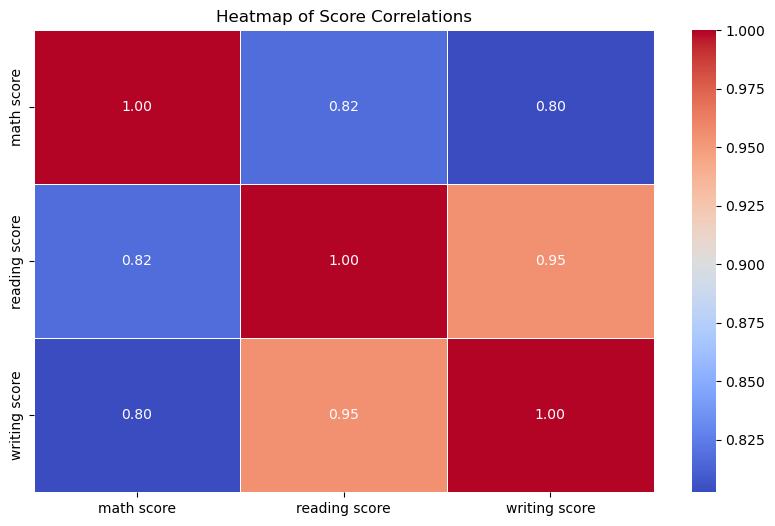

In [16]:
# Plotting the correlation matrix
def plot_heatmap(data, title='Heatmap', annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f"):
    """
    Plots a heatmap of the correlation matrix.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, annot=annot, cmap=cmap, linewidths=linewidths, fmt=fmt)
    plt.title(title)
    plt.show()


# Compute the correlation matrix
corr_matrix = clustering_data.corr()

# Generate a heatmap
plot_heatmap(corr_matrix, title='Heatmap of Score Correlations')
